# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных

**Признаки**
* *RowNumber* — индекс строки в данных
* *CustomerId* — уникальный идентификатор клиента
* *Surname* — фамилия
* *CreditScore* — кредитный рейтинг
* *Geography* — страна проживания
* *Gender* — пол
* *Age* — возраст
* *Tenure* — количество недвижимости у клиента
* *Balance* — баланс на счёте
* *NumOfProducts* — количество продуктов банка, используемых клиентом
* *HasCrCard* — наличие кредитной карты
* *IsActiveMember* — активность клиента
* *EstimatedSalary* — предполагаемая зарплата

**Целевой признак**
* *Exited* — факт ухода клиента

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Отток-клиентов" data-toc-modified-id="Отток-клиентов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Отток клиентов</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span></li><li><span><a href="#Анализ-зависимостей-в-данных" data-toc-modified-id="Анализ-зависимостей-в-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ зависимостей в данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Обучение-с-взвешенными-классами" data-toc-modified-id="Обучение-с-взвешенными-классами-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение с взвешенными классами</a></span></li><li><span><a href="#Выравнивание-соотношения-классов.-Upsampling-и-downsampling." data-toc-modified-id="Выравнивание-соотношения-классов.-Upsampling-и-downsampling.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выравнивание соотношения классов. Upsampling и downsampling.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Подготовка данных

## Загрузка и изучение данных

Импортируем необходимые библиотеки и загрузим данные. При чтении csv-файла будем использовать автоматическое определение разделителя с помощью движка python.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [3]:
# Требуемое минимальное значение метрики качества
REQUIRED_F1 = 0.59

churn_df = pd.read_csv('Churn.csv', sep=None, engine='python')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Проверим исходные данные на отсутствие пропусков.

In [4]:
churn_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 2.6 MB


909 значений пропущено в столбце 'Tenure'. В остальных столбцах пропусков нет.

Посмотрим, как распределены данные, в том числе, проверим выбросы.

RowNumber
count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: RowNumber, dtype: float64
CustomerId
count    1.000000e+04
mean     1.569094e+07
std      7.193619e+04
min      1.556570e+07
25%      1.562853e+07
50%      1.569074e+07
75%      1.575323e+07
max      1.581569e+07
Name: CustomerId, dtype: float64
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Debellis     1
Rioux        1
Earl         1
Wimble       1
Seppelt      1
Name: Surname, Length: 2932, dtype: int64

CreditScore
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
Geography
['France' 'Spain' 'Germany']
France     5014
Germany    2

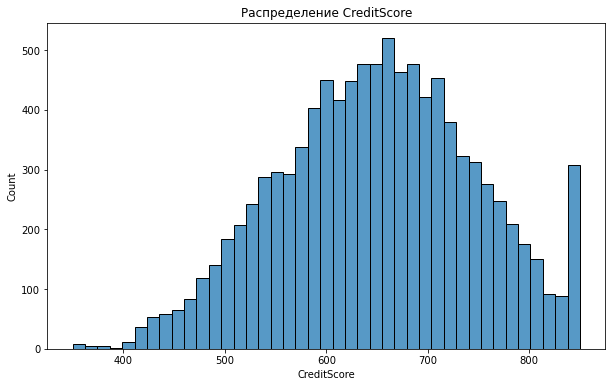

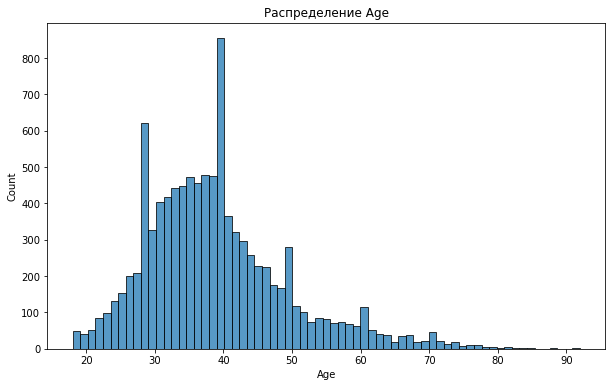

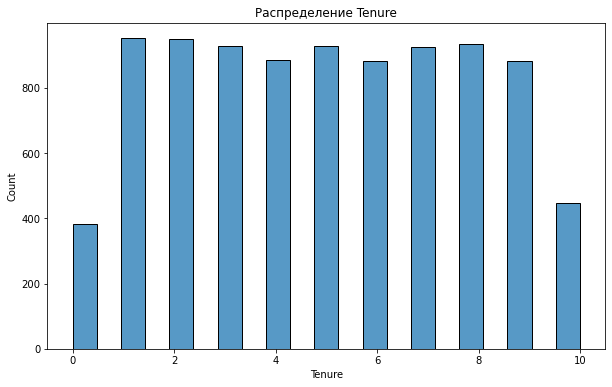

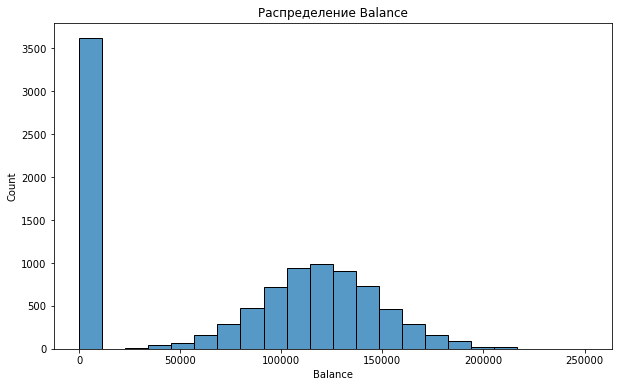

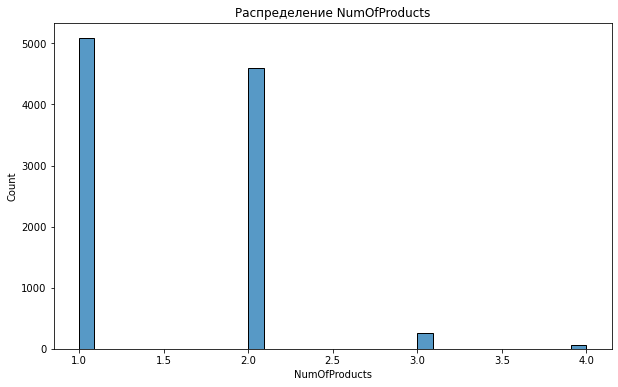

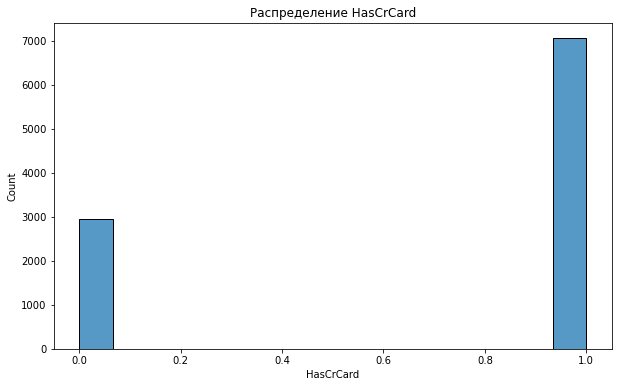

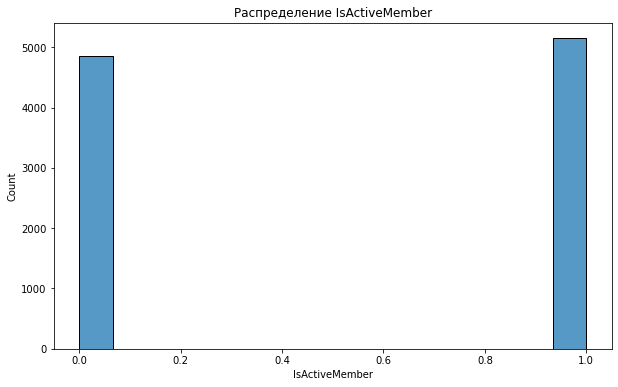

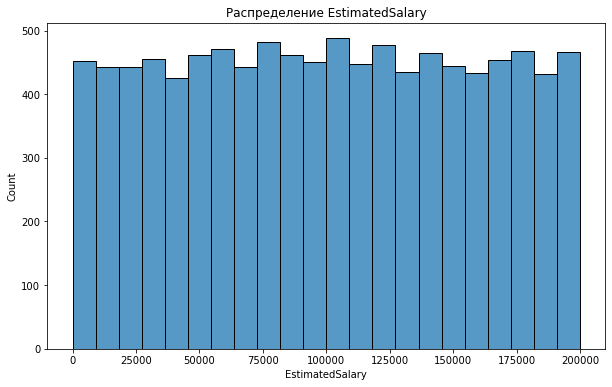

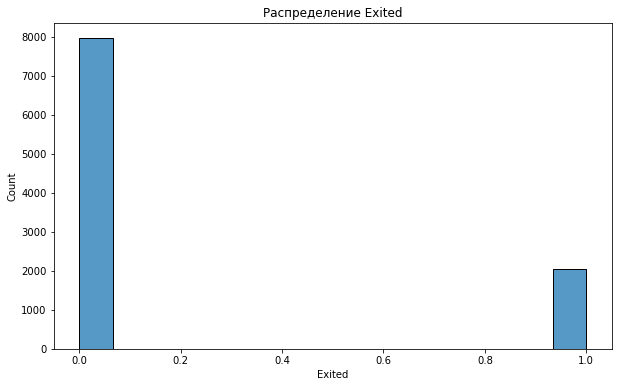

In [5]:
def info(data):
    """
    Функция пробегает по признакам датафрейма и, если тип у признака object,
    выводит уникальные значения и их количество, в противном случае 
    оценивается распределение
    
    """
    for column in data.columns:
        if data[column].dtype == 'object':
            print(column)
            print(data[column].unique())
            print(data[column].value_counts())
            print()
        else:
            print(column)
            print(data[column].describe())
            # Если число уникальных значений в столбце между 1 и длиной столбца, то вывести распределение признака
            if len(data[column].unique()) > 1 and len(data[column].unique()) != len(data[column]):
                plt.figure(figsize=(10, 6))
                sns.histplot(data[column])
                plt.title('Распределение '+ column);
                
info(churn_df)

Выбросы в столбцах "кредитный рейтинг" и "возраст" не являются промахами, не единичны и соответствуют возможным клиентам банка. Следовательно, удалять их нельзя, так как при этом будет утеряна часть информации.

Заметно, что значения кредитного рейтинга, возраста и баланса распределены примерно нормально, причём у кредитного рейтинга есть заметный скачок в максимальных значениях, а у баланса - в нуле. Количество недвижимости и предполагаемая зарплата распределены почти равномерно, что скорее всего говорит о искусственном отборе данных о клиентах.

## Обработка пропусков

В столбце "количество недвижимости" пропусков около 10%, и удаление их существенно уменьшит полезную информацию. Интуиция подсказывает, что признак должен как-то зависеть от зарплаты, возраста и, возможно, некоторых других численных показателей, т.е. имеет смысл заполнить пропуски. Проверим наше предположение - построим матрицу корреляций.

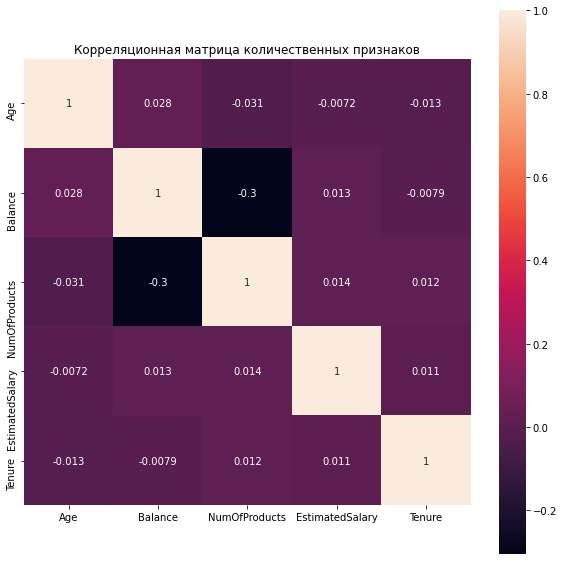

In [6]:
corr_matrix = churn_df[['Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, robust=True, square=True, annot=True)
plt.title('Корреляционная матрица количественных признаков')
plt.show()

Похоже, либо в данных зависимости практически нет, либо она сложнее. Заполнить пропуски мы можем либо определёнными числами (медианой или средним в некоторых классах), либо модельными прогнозами. Так как любое заполнение пропусков внесёт шум и немного исказит зависимости в данных и распределение признака, то выберем математический подход на основе прогноза модели.

Полноценные строки датафрейма выступят в роли обучающего множества, а строки с пропусками будем использовать для предсказания значений количества недвижимости.

In [7]:
features = churn_df[['Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
target = churn_df['Tenure']

features_train, features_predict = features[~target.isnull()], features[target.isnull()]
target_train = target[~target.isnull()]

features_train.shape, features_predict.shape

((9091, 4), (909, 4))

Обучим модель "случайный лес", округлим предсказания.

In [8]:
rfr = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=17)
rfr.fit(features_train, target_train)
target_predict = pd.Series(np.round(rfr.predict(features_predict)), index=features_predict.index)
target_predict.head()

30    6.0
48    3.0
51    6.0
53    4.0
60    4.0
dtype: float64

Заполним пропуски и проверим корректность операции.

In [9]:
churn_df['Tenure'].fillna(target_predict, inplace=True)
churn_df['Tenure'].isnull().sum()

0

Tenure
count    10000.000000
mean         4.998200
std          2.781253
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


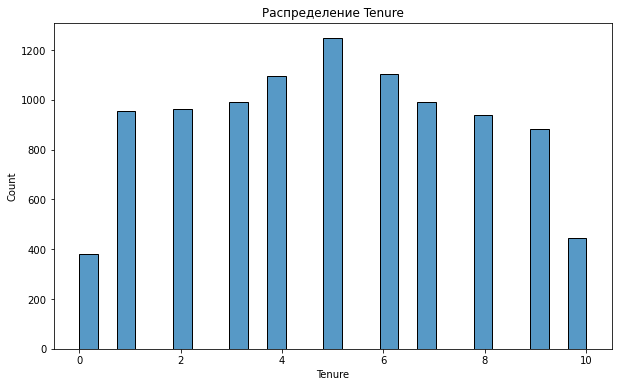

In [10]:
info(churn_df[['Tenure']])

Видим, что середина распределения немного поднялась.

## Кодирование категориальных признаков

Закодируем категориальные признаки методом OHE, удалив первые столбцы, чтобы избежать ловушки фиктивных переменных.

In [11]:
categorial_cols = ['Geography', 'Gender']
dummy_features = pd.get_dummies(churn_df[categorial_cols], drop_first=True)
dummy_features.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


Объединим новые столбцы с количественными и булевыми признаками исходного датафрейма.

In [12]:
cols_to_drop = ['RowNumber', 'CustomerId', 'Surname'] + categorial_cols

prepared_df = dummy_features.join(churn_df.drop(columns=cols_to_drop))
prepared_df.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2.0,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1.0,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8.0,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1.0,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2.0,125510.82,1,1,1,79084.10,0


## Анализ зависимостей в данных

Посмотрим на корреляцию между признаками для отбора перед обучением.

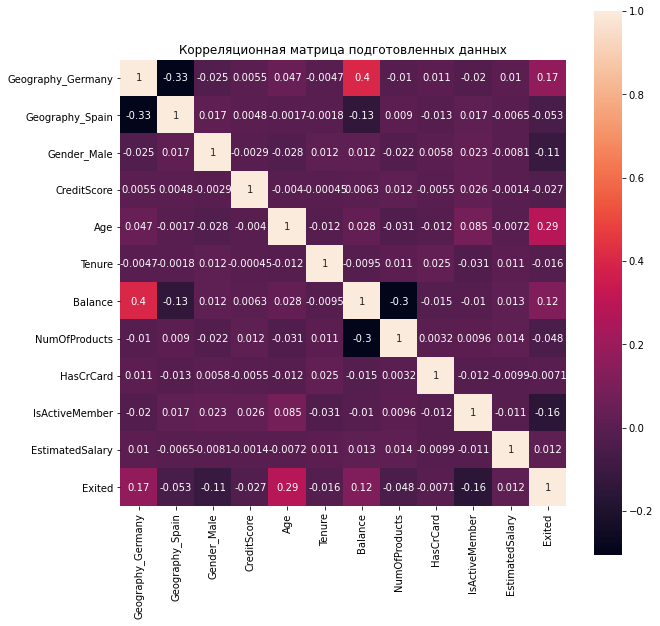

In [13]:
corr_matrix = prepared_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, robust=True, square=True, annot=True)
plt.title('Корреляционная матрица подготовленных данных')
plt.show()

Между признаками сильной зависимости нет, в т.ч. и с целевым признаком, поэтому оставим пока все признаки для обучения.

## Вывод

* Исходные данные представляют собой таблицу с 14 столбцами и 10000 строками.
* В столбце "количество недвижимости" 909 пропущенных значений были заменены на прогнозные значения модели "случайный лес".
* Выбросы в столбцах "кредитный рейтинг" и "возраст" не являются промахами, не единичны и соответствуют возможным клиентам банка; данные значения оставлены в датафрейме.
* Между признаками сильной зависимости нет, в т.ч. и с целевым признаком, все подготовленные признаки сохранены для обучения.

# Исследование задачи

Посмотрим, во сколько раз один класс в признаке 'Exited' превалирует над другим.

In [14]:
(1 - churn_df['Exited'].mean()) / churn_df['Exited'].mean()

3.909180166912126

Количество неушедших клиентов почти в 4 раза больше числа ушедших.

Проанализируем, как это скажется на обучении. Разделим данные на обучающую, валидационную и тестовую выборки.

In [15]:
features = prepared_df.drop(columns=['Exited'])
target = prepared_df['Exited']

features_train_base, features_test, target_train_base, target_test = train_test_split(
    features, target, test_size=0.2, random_state=17, stratify=target)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_base, target_train_base, test_size=0.25, random_state=17, stratify=target_train_base)

features_train.shape, features_valid.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

Напишем функцию для обучения-валидации моделей и вывода оценок качества классификации (F1 и AUC).

In [16]:
def get_train_valid_results(model, x_train, x_valid, y_train, y_valid, return_fitted=True):
    """
    Функция обучает и валидирует на полученных выборках модель и выводит метрики F1 и AUC
    для обучения и валидации.
    Опционально возвращает обученную модель.
    
    """
    try:
        model.fit(x_train, y_train)
        prediction_train = model.predict(x_train)
        prediction_proba_train = model.predict_proba(x_train)[:, 1]
        prediction_valid = model.predict(x_valid)
        prediction_proba_valid = model.predict_proba(x_valid)[:, 1]
        
        print('Train results')
        print('F1-score: {:.3f}'.format(f1_score(y_train, prediction_train)))
        print('AUC: {:.3f}'.format(roc_auc_score(y_train, prediction_proba_train)))
        print('\nValidation results')
        print('F1-score: {:.3f}'.format(f1_score(y_valid, prediction_valid)))
        print('AUC: {:.3f}'.format(roc_auc_score(y_valid, prediction_proba_valid)))
        
        if return_fitted:
            return model
                
    except Exception as e:
        exc_type = str(type(e)).split("'")[1]
        print('{}: {}'.format(exc_type, e))

Обучим модель логистической регрессии и посмотрим на результаты. Так как разный порядок числовых значений будет сильно влиять на веса признаков, то создадим пайплайн, где сначала происходит стандартизация количественных признаков и затем уже обучение самой модели.

In [17]:
scaler = StandardScaler()
logit = LogisticRegression(random_state=17)
pipe = make_pipeline(scaler, logit)

get_train_valid_results(pipe, features_train, features_valid, target_train, target_valid,
                        return_fitted=False)

Train results
F1-score: 0.338
AUC: 0.773

Validation results
F1-score: 0.339
AUC: 0.757


Довольно низкие показатели, что на обучении, что на валидации, значит, необходимо как-то учесть дисбаланс классов. Посмотрим, что покажет случайный лес.

In [18]:
rfc = RandomForestClassifier(random_state=17, n_jobs=-1)
get_train_valid_results(rfc, features_train, features_valid, target_train, target_valid,
                        return_fitted=False)

Train results
F1-score: 1.000
AUC: 1.000

Validation results
F1-score: 0.591
AUC: 0.849


Получше, но всё равно результат валидации меньше необходимого числа 0.59.

## Вывод

* Количество неушедших клиентов почти в 4 раза больше числа ушедших.
* Результаты валидации моделей на данных с несбалансированными классами хуже требуемого качества, что побуждает учесть дисбаланс классов признака 'Exited'.

# Борьба с дисбалансом

## Обучение с взвешенными классами

Обучим модели, предварительно передав значение 'balanced' параметру *class_weight*, и выведем дополнительно значения F1-меры для разных значений порога классификации.

In [19]:
scaler = StandardScaler()
logit = LogisticRegression(random_state=17, class_weight='balanced')
pipe = make_pipeline(scaler, logit)

logit = get_train_valid_results(pipe, features_train, features_valid, target_train, target_valid)

print()
prediction_proba = logit.predict_proba(features_valid)[:, 1]
for thresh in np.linspace(start=0.1, stop=0.9, num=9):
    prediction = [1 if x else 0 for x in (prediction_proba > thresh)]
    print('Treshold: {:.1f}\tF1-score: {:.3f}'.format(thresh, f1_score(target_valid, prediction)))

Train results
F1-score: 0.494
AUC: 0.777

Validation results
F1-score: 0.490
AUC: 0.761

Treshold: 0.1	F1-score: 0.345
Treshold: 0.2	F1-score: 0.379
Treshold: 0.3	F1-score: 0.415
Treshold: 0.4	F1-score: 0.463
Treshold: 0.5	F1-score: 0.490
Treshold: 0.6	F1-score: 0.480
Treshold: 0.7	F1-score: 0.437
Treshold: 0.8	F1-score: 0.326
Treshold: 0.9	F1-score: 0.091


Логистическая регрессия всё ещё показывает неудовлетворительное качество.

In [20]:
rfc = RandomForestClassifier(random_state=17, n_jobs=-1, class_weight='balanced')
rfc= get_train_valid_results(rfc, features_train, features_valid, target_train, target_valid)

print()
prediction_proba = rfc.predict_proba(features_valid)[:, 1]
for thresh in np.linspace(start=0.1, stop=0.9, num=9):
    prediction = [1 if x else 0 for x in (prediction_proba > thresh)]
    print('Treshold: {:.1f}\tF1-score: {:.3f}'.format(thresh, f1_score(target_valid, prediction)))

Train results
F1-score: 1.000
AUC: 1.000

Validation results
F1-score: 0.564
AUC: 0.842

Treshold: 0.1	F1-score: 0.489
Treshold: 0.2	F1-score: 0.579
Treshold: 0.3	F1-score: 0.622
Treshold: 0.4	F1-score: 0.615
Treshold: 0.5	F1-score: 0.564
Treshold: 0.6	F1-score: 0.528
Treshold: 0.7	F1-score: 0.429
Treshold: 0.8	F1-score: 0.249
Treshold: 0.9	F1-score: 0.084


Случайный лес повторил результаты валидации по метрике F1 при пороге 0.4, при этом слегка выросла метрика AUC.

Посмотрим на влияние признаков при построении деревьев в "случайном лесу".

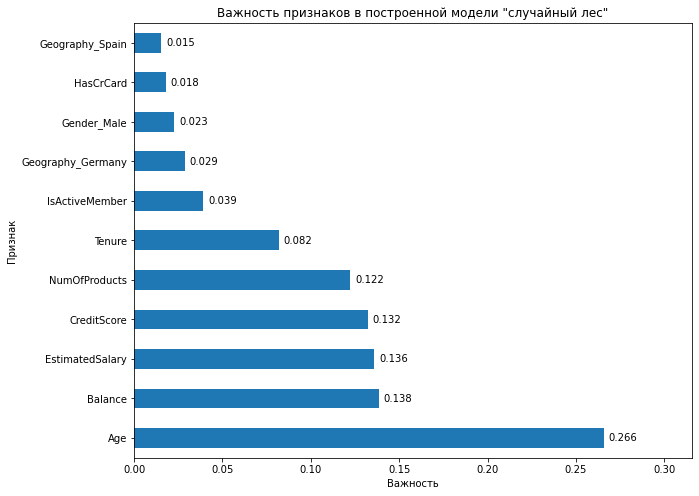

In [21]:
def add_value_labels(ax, spacing=5):
    """
    Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    rects = ax.patches
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.3f}".format(x_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha                       # Horizontally align label differently for
        )                               # positive and negative values.

        
feature_importances = pd.DataFrame(
    {'importance': rfc.feature_importances_},
    index=features.columns.to_list()
).sort_values('importance', ascending = False)

ax = feature_importances.plot(
    kind='barh',
    xlim=(0, feature_importances['importance'].max() + 0.05),
    title='Важность признаков в построенной модели "случайный лес"',
    figsize=(10, 8),
    legend=False
)

ax.set_xlabel('Важность')
ax.set_ylabel('Признак')
add_value_labels(ax)

Видно, что наиболее влиятельный признак при разбиении узла дерева "возраст", а также большее влияние имеют количественные признаки. Если критерием отбора признаков выбрать кумулятивную важность, равную 0.99, то все признаки попадают под этот критерий и, значит, ничего удалять не нужно.

## Выравнивание соотношения классов. Upsampling и downsampling.

Напишем функции для выравнивания соотношения классов путём копирования меньшего или удаления части большего.

In [22]:
def upsample(features, target):
    """
    Функция копирует строки с малочисленным классом (округлённое до целого число раз,
    в которое отличаются размеры классов), чтобы сбалансировать классы.
    
    """
    if target.mean() >= 0.5:
        ratio = target.mean() / (1 - target.mean())
        class_to_upsample = 0
    else:
        ratio = (1 - target.mean()) / target.mean()
        class_to_upsample = 1
        
    repeat = int(np.round(ratio))
    
    features_small_class = features[target == class_to_upsample]
    features_large_class = features[target == 1 - class_to_upsample]
    
    target_small_class = target[target == class_to_upsample]
    target_large_class = target[target == 1 - class_to_upsample]
    
    features_upsampled = pd.concat([features_large_class] + [features_small_class] * repeat)
    target_upsampled = pd.concat([target_large_class] + [target_small_class] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=17)
    
    return features_upsampled, target_upsampled


def downsample(features, target):
    """
    Функция отрезает строки с многочисленным классом, чтобы сбалансировать классы
    (удаляет такую долю, чтобы соотношение классов стало 1:1).
    
    """
    if target.mean() >= 0.5:
        fraction = (1 - target.mean()) / target.mean()
        class_to_downsample = 1
    else:
        fraction = target.mean() / (1 - target.mean())
        class_to_downsample = 0
        
    features_small_class = features[target == 1 - class_to_downsample]
    features_large_class = features[target == class_to_downsample]
    
    target_small_class = target[target == 1 - class_to_downsample]
    target_large_class = target[target == class_to_downsample]
    
    seed = 17
    features_downsampled = pd.concat([features_large_class.sample(frac=fraction, random_state=seed)] + [features_small_class])
    target_downsampled = pd.concat([target_large_class.sample(frac=fraction, random_state=seed)] + [target_small_class])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=seed)
    
    return features_downsampled, target_downsampled

Увеличим выборку и разделим её на обучающее и валидационное множества.

In [23]:
features_upsampled, target_upsampled = upsample(features_train_base, target_train_base)
features_train_u, features_valid_u, target_train_u, target_valid_u = train_test_split(
    features_upsampled, target_upsampled, test_size=0.25, random_state=17, stratify=target_upsampled)

features_train_u.shape, features_valid_u.shape

((9667, 11), (3223, 11))

Проверим изменение качества модели логистической регрессии.

In [24]:
scaler = StandardScaler()
logit = LogisticRegression(random_state=17)
pipe = make_pipeline(scaler, logit)

logit = get_train_valid_results(pipe, features_train_u, features_valid_u, target_train_u, target_valid_u)

print()
prediction_proba = logit.predict_proba(features_valid_u)[:, 1]
for thresh in np.linspace(start=0.1, stop=0.9, num=9):
    prediction = [1 if x else 0 for x in (prediction_proba > thresh)]
    print('Treshold: {:.1f}\tF1-score: {:.3f}'.format(thresh, f1_score(target_valid_u, prediction)))

Train results
F1-score: 0.712
AUC: 0.773

Validation results
F1-score: 0.704
AUC: 0.773

Treshold: 0.1	F1-score: 0.675
Treshold: 0.2	F1-score: 0.699
Treshold: 0.3	F1-score: 0.725
Treshold: 0.4	F1-score: 0.731
Treshold: 0.5	F1-score: 0.704
Treshold: 0.6	F1-score: 0.631
Treshold: 0.7	F1-score: 0.523
Treshold: 0.8	F1-score: 0.361
Treshold: 0.9	F1-score: 0.116


Заметно лучше результаты, при пороге 0.4 F1-мера достигает значения 0.731 на валидационной выборке.

Проверим изменение качества модели "случайный лес".

In [25]:
rfc = RandomForestClassifier(random_state=17, n_jobs=-1)
rfc= get_train_valid_results(rfc, features_train_u, features_valid_u, target_train_u, target_valid_u)

print()
prediction_proba = rfc.predict_proba(features_valid_u)[:, 1]
for thresh in np.linspace(start=0.1, stop=0.9, num=9):
    prediction = [1 if x else 0 for x in (prediction_proba > thresh)]
    print('Treshold: {:.1f}\tF1-score: {:.3f}'.format(thresh, f1_score(target_valid_u, prediction)))

Train results
F1-score: 1.000
AUC: 1.000

Validation results
F1-score: 0.962
AUC: 0.996

Treshold: 0.1	F1-score: 0.769
Treshold: 0.2	F1-score: 0.845
Treshold: 0.3	F1-score: 0.897
Treshold: 0.4	F1-score: 0.938
Treshold: 0.5	F1-score: 0.962
Treshold: 0.6	F1-score: 0.978
Treshold: 0.7	F1-score: 0.977
Treshold: 0.8	F1-score: 0.960
Treshold: 0.9	F1-score: 0.890


Модель, похоже, переобучилась. При пороге 0.6 F1-мера достигает значения 0.966 на валидационной выборке, что не удивительно: часть строк повторяет строки из обучающего набора.

Теперь уменьшим выборку и разделим её на обучающее и валидационное множества.

In [26]:
features_downsampled, target_downsampled = downsample(features_train_base, target_train_base)
features_train_d, features_valid_d, target_train_d, target_valid_d = train_test_split(
    features_downsampled, target_downsampled, test_size=0.25, random_state=17, stratify=target_downsampled)

features_train_d.shape, features_valid_d.shape

((2445, 11), (815, 11))

Проверим изменение качества модели логистической регрессии.

In [27]:
logit = get_train_valid_results(pipe, features_train_d, features_valid_d, target_train_d, target_valid_d)

print()
prediction_proba = logit.predict_proba(features_valid_d)[:, 1]
for thresh in np.linspace(start=0.1, stop=0.9, num=9):
    prediction = [1 if x else 0 for x in (prediction_proba > thresh)]
    print('Treshold: {:.1f}\tF1-score: {:.3f}'.format(thresh, f1_score(target_valid_d, prediction)))

Train results
F1-score: 0.701
AUC: 0.771

Validation results
F1-score: 0.695
AUC: 0.761

Treshold: 0.1	F1-score: 0.672
Treshold: 0.2	F1-score: 0.688
Treshold: 0.3	F1-score: 0.716
Treshold: 0.4	F1-score: 0.725
Treshold: 0.5	F1-score: 0.695
Treshold: 0.6	F1-score: 0.607
Treshold: 0.7	F1-score: 0.492
Treshold: 0.8	F1-score: 0.297
Treshold: 0.9	F1-score: 0.080


Сравнительно похожие результаты с показанными на увеличенной выборке: при пороге 0.4 F1-мера достигает значения 0.725 против 0.731.

Проверим изменение качества модели "случайный лес".

In [28]:
rfc = RandomForestClassifier(random_state=17, n_jobs=-1)
rfc= get_train_valid_results(rfc, features_train_d, features_valid_d, target_train_d, target_valid_d)

print()
prediction_proba = rfc.predict_proba(features_valid_d)[:, 1]
for thresh in np.linspace(start=0.1, stop=0.9, num=9):
    prediction = [1 if x else 0 for x in (prediction_proba > thresh)]
    print('Treshold: {:.1f}\tF1-score: {:.3f}'.format(thresh, f1_score(target_valid_d, prediction)))

Train results
F1-score: 1.000
AUC: 1.000

Validation results
F1-score: 0.742
AUC: 0.839

Treshold: 0.1	F1-score: 0.700
Treshold: 0.2	F1-score: 0.735
Treshold: 0.3	F1-score: 0.763
Treshold: 0.4	F1-score: 0.759
Treshold: 0.5	F1-score: 0.742
Treshold: 0.6	F1-score: 0.724
Treshold: 0.7	F1-score: 0.653
Treshold: 0.8	F1-score: 0.533
Treshold: 0.9	F1-score: 0.287


Модель также переобучилась. При пороге 0.3 F1-мера достигает значения 0.747 на валидационной выборке.

На увеличенной и уменьшенной выборках модели показали хорошие результаты, которые удовлетворяют требуемому качеству, поэтому возьмём их для настройки гиперпараметров, чтобы ещё немного улучшить качество и робастность моделей.

Подберём значение параметра регуляризации логистической регрессии в процессе кросс-валидации на увеличенной выборке.

Лучшая F1-мера на обучающей выборке: 0.711
Лучшая F1-мера на валидационной выборке: 0.712

Лучшие параметры модели "логистическая регрессия":
С = 0.010


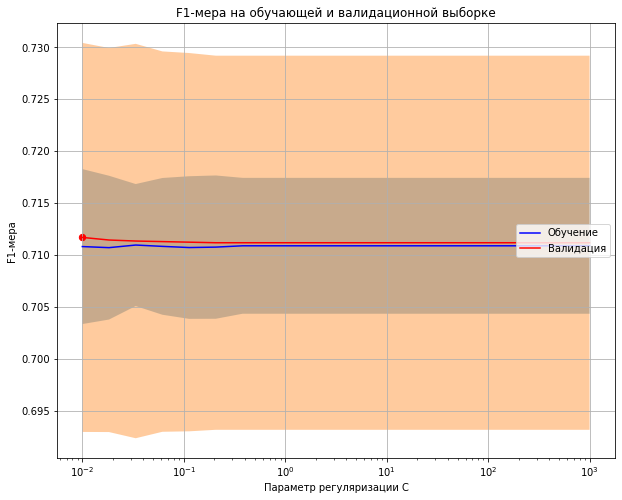

In [29]:
# Создадим функцию для отображения доверительного интервала в виде закрашенной области
def fill_confidence_interval(x, y, y_std, half_interval=3):
    ci_up_lim = y + half_interval*y_std
    ci_low_lim = y - half_interval*y_std
    plt.fill_between(x, ci_up_lim, ci_low_lim, alpha=0.4)


# Инициализируем страифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

# Зададим набор значений параметра регуляризации С
rng = np.logspace(-2, 3, 20)
params = {'logisticregression__C': rng}

# Инициализируем и проведём кросс-валидацию
logit_grid = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    return_train_score=True
)
logit_grid.fit(features_upsampled, target_upsampled)

c_best = logit_grid.best_params_['logisticregression__C']
logit_u_best = logit_grid.best_estimator_

# Выведем результаты обучения и тестирования
train_score = logit_grid.cv_results_['mean_train_score']
train_std = logit_grid.cv_results_['std_train_score']
test_score = logit_grid.cv_results_['mean_test_score']
test_std = logit_grid.cv_results_['std_test_score']
x = rng

plt.figure(figsize=(10, 8))

fill_confidence_interval(x, train_score, train_std)
fill_confidence_interval(x, test_score, test_std)
plt.plot(x, train_score, "b", label='Обучение')
plt.plot(x, test_score, "r", label='Валидация')
plt.scatter(logit_grid.best_params_['logisticregression__C'], test_score.max(), c='red', s=40)
plt.legend(loc='center right')
plt.xticks(ticks=x)
plt.xscale('log')
plt.xlabel('Параметр регуляризации С')
plt.ylabel('F1-мера')
plt.title('F1-мера на обучающей и валидационной выборке')
plt.grid(True)

print('Лучшая F1-мера на обучающей выборке: {:.3f}'.format(train_score[test_score == test_score.max()][0]))
print('Лучшая F1-мера на валидационной выборке: {:.3f}'.format(test_score.max()))
print()
print('Лучшие параметры модели "логистическая регрессия":')
print('С = {:.3f}'.format(c_best))

Повторим то же самое на уменьшенной выборке.

Лучшая F1-мера на обучающей выборке: 0.705
Лучшая F1-мера на валидационной выборке: 0.704

Лучшие параметры модели "логистическая регрессия":
С = 0.695


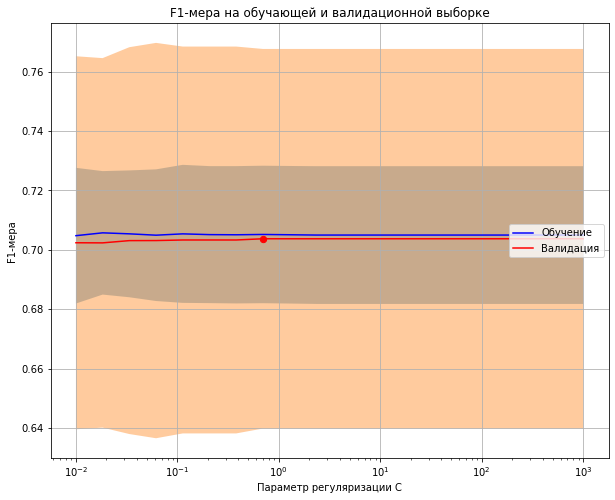

In [30]:
# Проведём кросс-валидацию
logit_grid.fit(features_downsampled, target_downsampled)

c_best = logit_grid.best_params_['logisticregression__C']
logit_d_best = logit_grid.best_estimator_

# Выведем результаты обучения и тестирования
train_score = logit_grid.cv_results_['mean_train_score']
train_std = logit_grid.cv_results_['std_train_score']
test_score = logit_grid.cv_results_['mean_test_score']
test_std = logit_grid.cv_results_['std_test_score']
x = rng

plt.figure(figsize=(10, 8))

fill_confidence_interval(x, train_score, train_std)
fill_confidence_interval(x, test_score, test_std)
plt.plot(x, train_score, "b", label='Обучение')
plt.plot(x, test_score, "r", label='Валидация')
plt.scatter(logit_grid.best_params_['logisticregression__C'], test_score.max(), c='red', s=40)
plt.legend(loc='center right')
plt.xticks(ticks=x)
plt.xscale('log')
plt.xlabel('Параметр регуляризации С')
plt.ylabel('F1-мера')
plt.title('F1-мера на обучающей и валидационной выборке')
plt.grid(True)

print('Лучшая F1-мера на обучающей выборке: {:.3f}'.format(train_score[test_score == test_score.max()][0]))
print('Лучшая F1-мера на валидационной выборке: {:.3f}'.format(test_score.max()))
print()
print('Лучшие параметры модели "логистическая регрессия":')
print('С = {:.3f}'.format(c_best))

Подберём число деревьев и их глубину в модели "случайный лес" на увеличенной выборке.

Лучшая F1-мера на обучающей выборке: 1.000
Лучшая F1-мера на валидационной выборке: 0.959

Лучшие параметры модели "случайный лес":
Число деревьев = 90
Максимальная глубина деревьев = 23


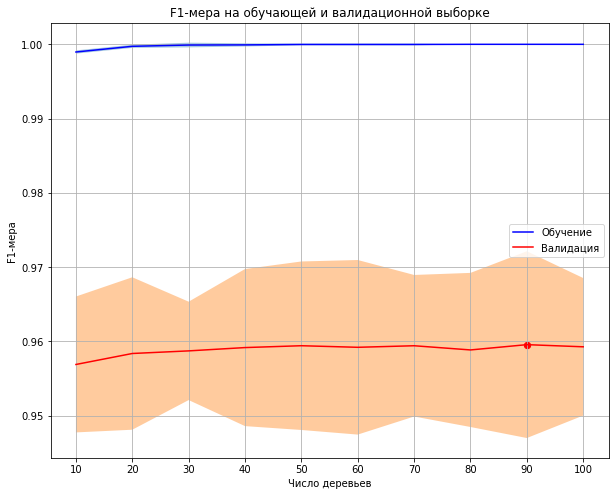

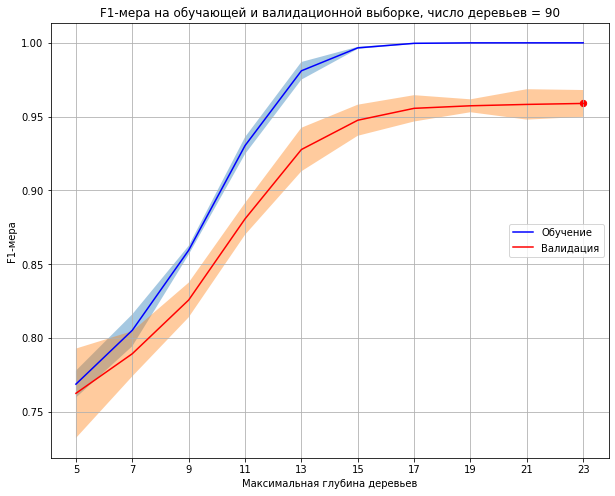

In [31]:
# Инициализируем классификатор "случайный лес"
rfc = RandomForestClassifier(random_state=17, n_jobs=-1)

# Зададим набор значений числа базовых моделей n_estimators
rng = range(10, 110, 10)
params = {'n_estimators': rng}

# Инициализируем и проведём кросс-валидацию
rfc_grid = GridSearchCV(
    estimator=rfc,
    param_grid=params,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    return_train_score=True
)
rfc_grid.fit(features_upsampled, target_upsampled)

# Выведем результаты обучения и тестирования
train_score = rfc_grid.cv_results_['mean_train_score']
train_std = rfc_grid.cv_results_['std_train_score']
test_score = rfc_grid.cv_results_['mean_test_score']
test_std = rfc_grid.cv_results_['std_test_score']
x = rng

plt.figure(figsize=(10, 8))

fill_confidence_interval(x, train_score, train_std)
fill_confidence_interval(x, test_score, test_std)
plt.plot(x, train_score, "b", label='Обучение')
plt.plot(x, test_score, "r", label='Валидация')
plt.scatter(rfc_grid.best_params_['n_estimators'], test_score.max(), c='red', s=40)
plt.legend(loc='center right')
plt.xticks(ticks=x)
plt.xlabel('Число деревьев')
plt.ylabel('F1-мера')
plt.title('F1-мера на обучающей и валидационной выборке')
plt.grid(True)

n_estimators_ = rfc_grid.best_params_['n_estimators']

# Повторим эксперимент, зафиксируем число базовых моделей n_estimators
# и зададим значения глубины дерева max_depth
rfc = RandomForestClassifier(n_estimators=n_estimators_, random_state=17, n_jobs=-1)
rng = range(5, 25, 2)
rfc_params = {'max_depth': rng}
rfc_grid = GridSearchCV(
    rfc,
    rfc_params,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    return_train_score=True
)
rfc_grid.fit(features_upsampled, target_upsampled)

# Сохраним лучшую модель
rfc_u_best = rfc_grid.best_estimator_

# Выведем результаты обучения и валидации
train_score = rfc_grid.cv_results_['mean_train_score']
train_std = rfc_grid.cv_results_['std_train_score']
test_score = rfc_grid.cv_results_['mean_test_score']
test_std = rfc_grid.cv_results_['std_test_score']
x = rng

plt.figure(figsize=(10, 8))

fill_confidence_interval(x, train_score, train_std)
fill_confidence_interval(x, test_score, test_std)
plt.plot(x, train_score, "b", label='Обучение')
plt.plot(x, test_score, "r", label='Валидация')
plt.scatter(rfc_grid.best_params_['max_depth'], test_score.max(), c='red', s=40)
plt.legend(loc='center right')
plt.xticks(ticks=x)
plt.xlabel('Максимальная глубина деревьев')
plt.ylabel('F1-мера')
ttl = 'F1-мера на обучающей и валидационной выборке, число деревьев = '+ str(n_estimators_)
plt.title(ttl)
plt.grid(True)

print('Лучшая F1-мера на обучающей выборке: {:.3f}'.format(train_score[test_score == test_score.max()][0]))
print('Лучшая F1-мера на валидационной выборке: {:.3f}'.format(test_score.max()))
print()
print('Лучшие параметры модели "случайный лес":')
print('Число деревьев =', n_estimators_)
print('Максимальная глубина деревьев =', rfc_grid.best_params_['max_depth'])

Повторим то же самое на уменьшенной выборке.

Лучшая F1-мера на обучающей выборке: 1.000
Лучшая F1-мера на валидационной выборке: 0.758

Лучшие параметры модели "случайный лес":
Число деревьев = 80
Максимальная глубина деревьев = 21


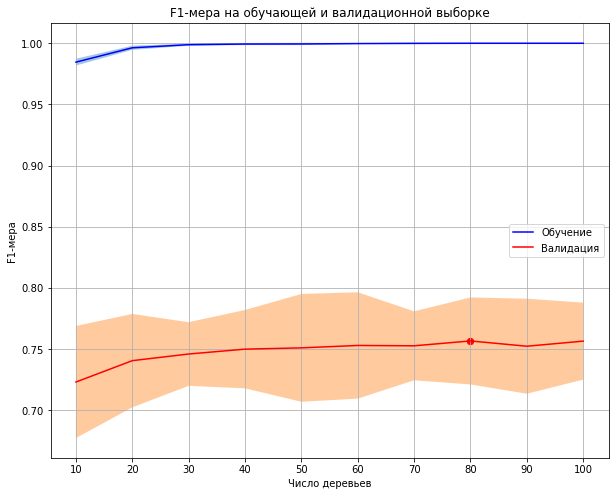

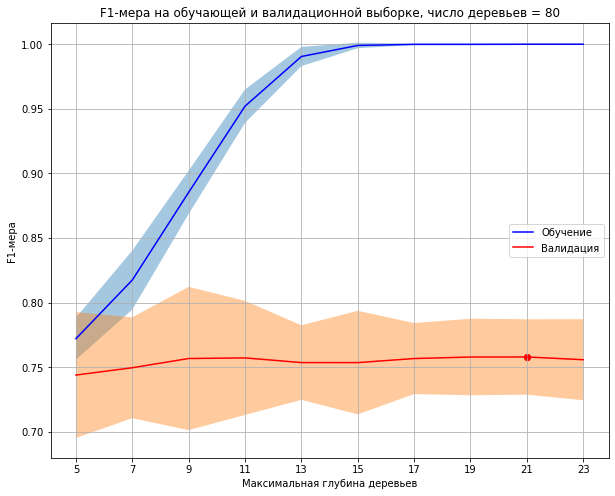

In [32]:
# Инициализируем классификатор "случайный лес"
rfc = RandomForestClassifier(random_state=17, n_jobs=-1)

# Зададим набор значений числа базовых моделей n_estimators
rng = range(10, 110, 10)
params = {'n_estimators': rng}

# Инициализируем и проведём кросс-валидацию
rfc_grid = GridSearchCV(
    estimator=rfc,
    param_grid=params,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    return_train_score=True
)
rfc_grid.fit(features_downsampled, target_downsampled)

# Выведем результаты обучения и тестирования
train_score = rfc_grid.cv_results_['mean_train_score']
train_std = rfc_grid.cv_results_['std_train_score']
test_score = rfc_grid.cv_results_['mean_test_score']
test_std = rfc_grid.cv_results_['std_test_score']
x = rng

plt.figure(figsize=(10, 8))

fill_confidence_interval(x, train_score, train_std)
fill_confidence_interval(x, test_score, test_std)
plt.plot(x, train_score, "b", label='Обучение')
plt.plot(x, test_score, "r", label='Валидация')
plt.scatter(rfc_grid.best_params_['n_estimators'], test_score.max(), c='red', s=40)
plt.legend(loc='center right')
plt.xticks(ticks=x)
plt.xlabel('Число деревьев')
plt.ylabel('F1-мера')
plt.title('F1-мера на обучающей и валидационной выборке')
plt.grid(True)

n_estimators_ = rfc_grid.best_params_['n_estimators']

# Повторим эксперимент, зафиксируем число базовых моделей n_estimators
# и зададим значения глубины дерева max_depth
rfc = RandomForestClassifier(n_estimators=n_estimators_, random_state=17, n_jobs=-1)
rng = range(5, 25, 2)
rfc_params = {'max_depth': rng}
rfc_grid = GridSearchCV(
    rfc,
    rfc_params,
    cv=skf,
    scoring='f1',
    n_jobs=-1,
    return_train_score=True
)
rfc_grid.fit(features_downsampled, target_downsampled)

# Сохраним лучшую модель
rfc_d_best = rfc_grid.best_estimator_

# Выведем результаты обучения и валидации
train_score = rfc_grid.cv_results_['mean_train_score']
train_std = rfc_grid.cv_results_['std_train_score']
test_score = rfc_grid.cv_results_['mean_test_score']
test_std = rfc_grid.cv_results_['std_test_score']
x = rng

plt.figure(figsize=(10, 8))

fill_confidence_interval(x, train_score, train_std)
fill_confidence_interval(x, test_score, test_std)
plt.plot(x, train_score, "b", label='Обучение')
plt.plot(x, test_score, "r", label='Валидация')
plt.scatter(rfc_grid.best_params_['max_depth'], test_score.max(), c='red', s=40)
plt.legend(loc='center right')
plt.xticks(ticks=x)
plt.xlabel('Максимальная глубина деревьев')
plt.ylabel('F1-мера')
ttl = 'F1-мера на обучающей и валидационной выборке, число деревьев = '+ str(n_estimators_)
plt.title(ttl)
plt.grid(True)

print('Лучшая F1-мера на обучающей выборке: {:.3f}'.format(train_score[test_score == test_score.max()][0]))
print('Лучшая F1-мера на валидационной выборке: {:.3f}'.format(test_score.max()))
print()
print('Лучшие параметры модели "случайный лес":')
print('Число деревьев =', n_estimators_)
print('Максимальная глубина деревьев =', rfc_grid.best_params_['max_depth'])

Здесь переобучение неприемлемо, так как объекты не дублированы в тренировочной и валидационной выборках, поэтому без значимой потери в качестве можно взять максимальную глубину деревьев, равную 11.

In [33]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=11, random_state=17, n_jobs=-1)
rfc_d_best = rfc.fit(features_downsampled, target_downsampled)

## Вывод

* Проведён анализ результатов моделей при обучении на взвешенных классах и на сбалансированных выборках методами upsampling и downsampling.
* Качество, удовлетворяющее заданному, показали модели логистической регрессии и случайного леса на сбалансированных выборках. Проведён подбор гиперпараметров данных моделей с кросс-валидацией.

Полученные гиперпараметры:
* Логистическая регрессия, upsampling:
    * С = 0.018
* Логистическая регрессия, downsampling:
    * С = 0.207
* Случайный лес, upsampling:
    * Число деревьев = 30
    * Максимальная глубина деревьев = 23
* Случайный лес, downsampling:
    * Число деревьев = 100
    * Максимальная глубина деревьев = 11

# Тестирование модели

Проверим качество моделей на тестовой выборке.

Логистическая регрессия, upsampling
Лучшее значение F1: 0.504
Порог классификации: 0.55

Логистическая регрессия, downsampling
Лучшее значение F1: 0.509
Порог классификации: 0.59

Случайный лес, upsampling
Лучшее значение F1: 0.619
Порог классификации: 0.39

Случайный лес, downsampling
Лучшее значение F1: 0.614
Порог классификации: 0.55



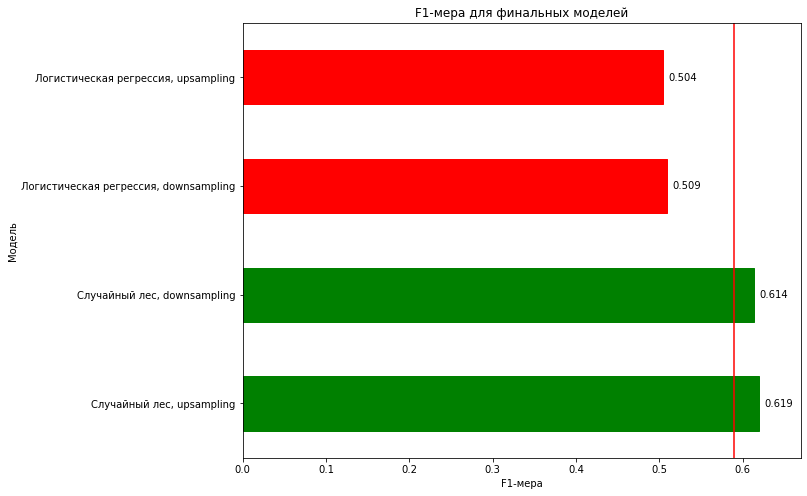

In [34]:
models_dict = {
    'Логистическая регрессия, upsampling': logit_u_best,
    'Логистическая регрессия, downsampling': logit_d_best,
    'Случайный лес, upsampling': rfc_u_best,
    'Случайный лес, downsampling': rfc_d_best
}

# Посчитаем f1 для финальных моделей
best_f1_scores = []

for desc, model in models_dict.items():
    print(desc)
    f1 = []
    thresholds = np.array(np.linspace(start=0.01, stop=0.99, num=99))
    prediction_proba = model.predict_proba(features_test)[:, 1]
    for thresh in thresholds:
        prediction = [1 if x else 0 for x in (prediction_proba > thresh)]
        f1.append(f1_score(target_test, prediction))
    f1 = np.array(f1)
    
    best_f1_scores.append(f1.max())
    best_thresh = thresholds[f1 == f1.max()][0]
    print('Лучшее значение F1: {:.3f}'.format(f1.max()))
    print('Порог классификации: {}'.format(best_thresh))
    print()

# Поместим оценки в датафрейм
f1_df = pd.DataFrame(
    {'f1': best_f1_scores},
    index=models_dict.keys()
).sort_values('f1', ascending = False)

# Построим горизонтальную столбчатую диаграмму
ax = f1_df.plot(
    kind='barh',
    xlim=(0, f1_df['f1'].max() + 0.05),
    title='F1-мера для финальных моделей',
    figsize=(10, 8),
    legend=False
)

# Не прошедшие по качеству модели отметим красным цветом, остальные - зелёным
not_passed = f1_df['f1'] < REQUIRED_F1
[
    ax.get_children()[i].set_color('r')
    if b
    else ax.get_children()[i].set_color('g')
    for i, b in enumerate(not_passed)
]

ax.set_xlabel('F1-мера')
ax.set_ylabel('Модель')
add_value_labels(ax)

# Нарисуем порог по качеству
plt.axvline(0.59, color='red');

Прошли проверку по метрике *F1* две модели случайного леса, лучшей оказалась та, которая была обучена на увеличенной методом downsampling выборке.

Проверим модели на адекватность и сравним качество по метрике *ROC-AUC*.

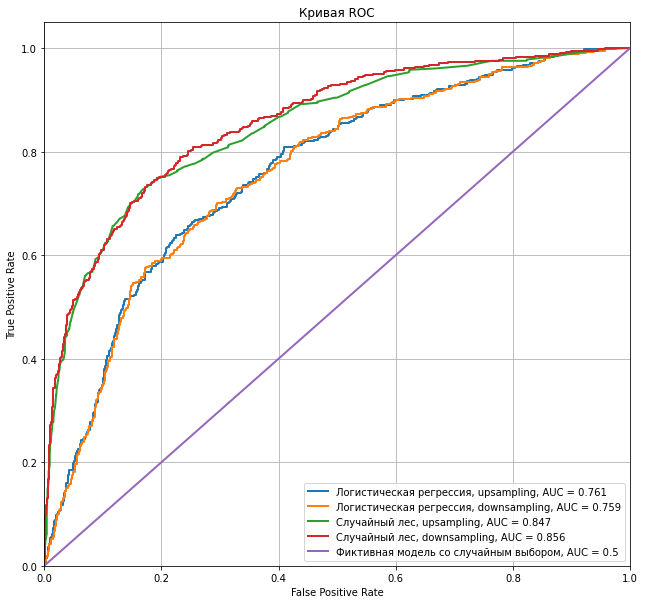

In [35]:
def plot_roc_for_models_dict(models_dict):
    for desc, model in models_dict.items():
        fpr, tpr, thresholds = roc_curve(target_test, model.predict_proba(features_test)[:,1], pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=desc + ', AUC = ' + str(np.round(roc_auc, decimals=3)))


dummy_dict = {
    'Фиктивная модель со случайным выбором': DummyClassifier(strategy='uniform', random_state=17)
    .fit(features_downsampled, target_downsampled)
}

plt.figure(figsize=(10.5, 10))

plot_roc_for_models_dict(models_dict)
plot_roc_for_models_dict(dummy_dict)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Кривая ROC')
plt.grid(True)
plt.show()

Все модели адекватны, так как площадь под их кривыми ROC больше, чем у фиктивной модели классификации. Здесь модель "случайный лес" на уменьшенной выборке также лучшая по значению метрики.

## Вывод

Таким образом из финальных моделей две прошли порог по метрике F1 = 0.59: "случайный лес" на увеличенной и на уменьшенной выборке. Лучшая по метрикам F1 и AUC - "случайный лес", обученный на уменьшенной выборке:
* F1 = 0.614
* AUC = 0,856

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*